In [7]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 90)

data_path = '../../data/Prod data.xlsx'
#df = pd.read_excel(data_path, index_col=1)  # в качестве индекса используется столбец скважин
df = pd.read_excel(data_path)  # в качестве индекса используется столбец скважин
#df[:5]

### Извлечение из таблицы последнего исторического дебита

In [8]:
well_name = 'Plat-2'
last_hist_date = '2020-03-01'

# извлечение строчки по скважине на заданную дату
#df[(df['Well'] == well_name) & (df['Date'] == last_hist_date)]

# извлечение месячной добычи по скважине на нужную дату (послдней исторической)
#df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)]

# месячгая добыча / кол-во часов работы * 24 = среднесуточный дебит
last_hist_rate = df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] \
/ df['Working hours'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] * 24

# преобразование объекта series в число
last_hist_rate = last_hist_rate.item()

### Создание кривой падения добычи (по Арпсу)

In [9]:
qi = last_hist_rate       # начальный дебит = последнему историческому
d = 0.05                  # коэффициент Арпса
q_elim = 3                # экономический предел остановки скважины
s_date_fc = '2020-04-01'  # начальная дата прогноза
# =================================================================================
q_fc = []
month_no = 1  # начинаем считать месяцы с первого (с нулевого если дебит 1-го мес-ца как посл-ий истор-ий)
#q = qi        # 
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # массив дебитов (прогнозных)

# генерация массива дат для прогноза
dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS')

# объединение прогнозных дебитов и массива дат как индекса в объекте Series
q_fc_series = pd.Series(q_fc, index=dates_fc)
#q_fc_series.plot() # построение графика добычи

### Отрисовка исторических данных с прогнозом

No handles with labels found to put in legend.


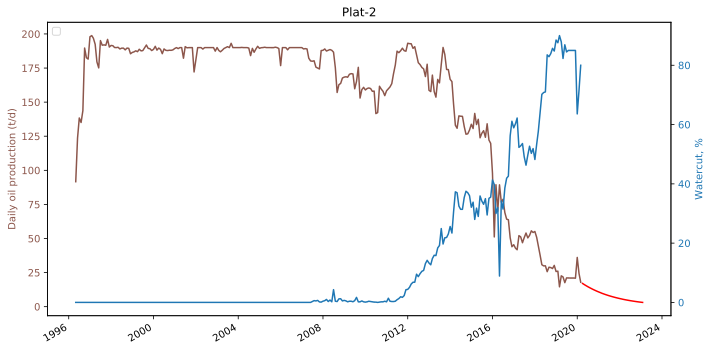

In [10]:
#t = df['Date']  # well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(df['Date'], data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# кривая прогноза
q_fc_series.plot(color="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Date'], data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color="black")

plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()

### Построение кривой падения добычи в логарифмическом масштабе

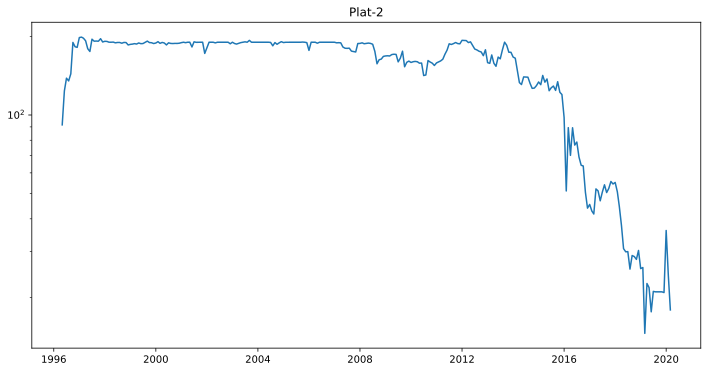

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
plt.plot(df['Date'], data1)
plt.yscale(value="log")
#plt.axis([-5, 5, -8, 8])
plt.title(well_name)
plt.show()

# Backup

ValueError: x and y must be the same size

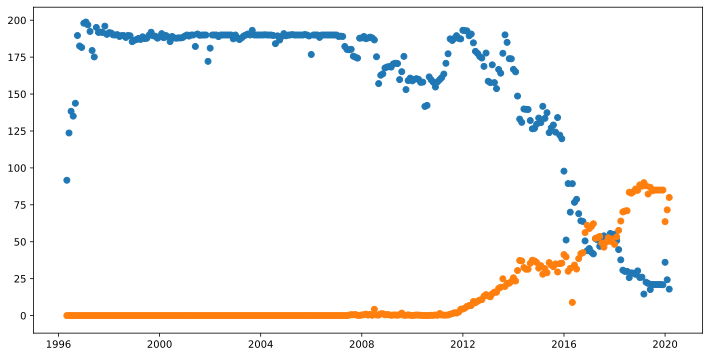

In [12]:
well_name = 'Plat-2'

plt.figure(figsize = (12, 6))
plt.scatter(df['Date'],
           (df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24))
plt.scatter(df['Date'], df['WCT, %'].where(df['Well'] == well_name))
plt.scatter(df['Date'], q_fc)
plt.title('Daily oil production (t/d)')
plt.ylabel('Daily oil production (t/d)')
plt.title(well_name)
plt.show()

In [ ]:
plt.plot(['2010-01-01'] * 100, np.linspace(0, 100, 100), label='median', linestyle='--', linewidth=4)
plt.show()

In [ ]:
#df.dtypes  # типы данных
# Приведение данных к типу данных float
# df['Oil production (actual), t'] = df['Oil production (actual), t'].astype('float')
# df['Working hours'] = df['Working hours'].astype('float')

In [ ]:
df['Date']
well_name = 'Plat-2'
(df['Oil production (actual), t'].where(df['Well'] == well_name)  / df['Working hours'] * 24)[:1] , df['Date']

In [ ]:
df['Date']
well_name = 'Plat-2'
(df['Oil production (actual), t'].where(df['Well'] == well_name)  / df['Working hours'] * 24).tail(5)

In [ ]:
t = df['Date']
well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1.plot(t, data3, color=color)

legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color="black")

plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()